In [2]:
# importing Libraries and load dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [3]:
pip install mlxtend


   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   --------------- ------------------------ 0.5/1.4 MB 216.9 kB/s eta 0:00:04
   --------------- ------------------------ 0.5/1.4 MB 216.9 kB/s eta 0:00:04
   --------------- ------------------------ 0.5/1.4 MB 216.9 kB/s eta 0:00:04
   --------------- ------------------------ 0.5/1.4 MB 216.9 kB/s eta 0:00:

In [1]:
from mlxtend.frequent_patterns import apriori, association_rules

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = r"C:\Users\K\Downloads\Cassava_Yield_Data.xlsx"
df = pd.read_excel(r"C:\Users\K\Downloads\Cassava_Yield_Data.xlsx")

In [ ]:
#QUESTION ONE: You have been provided with an excel book on Cassava Yield Data.Explore the dataset showing the distribution of all the variables (“Sesn” to "TotalTuberperHectare"). Further explore the variables for missing data and outliers. Go ahead and transform the dataset to handle missing information and outliers. (10 MARKS)

In [12]:
df.head()

,Sesn,locn,block,rep,tillage,ferT,Plants_harvested,No_bigtubers,Weigh_bigtubers,No_mediumtubers,Weight_mediumtubers,No_smalltubers,Weight_smalltubers,Totaltuberno,AV_tubers_Plant,Total_tubweight,plotsize,HEC,TotalWeightperhectare,TotalTuberperHectare
30,1,1,1,1,conv,F1100,20,0,0.0,32,1.3,80,1.0,112,5.600000,2.3,4.2,10000,5476.190476,266666.666667
31,1,1,1,1,conv,F3200,18,0,0.0,44,1.8,101,1.7,145,8.055556,3.5,4.2,10000,8333.333333,345238.095238
32,1,1,1,1,conv,F2150,18,0,0.0,6,0.2,90,0.9,96,5.333333,1.1,4.2,10000,2619.047619,228571.428571
35,1,1,2,2,conv,F1100,19,0,0.0,75,4.5,120,2.4,195,10.263158,6.9,4.2,10000,16428.571429,464285.714286
37,1,1,2,2,conv,F2150,19,0,0.0,24,1.0,180,2.2,204,10.736842,3.2,4.2,10000,7619.047619,485714.285714


In [4]:
print(df.describe(include='all'))

              Sesn        locn       block         rep tillage    ferT  \
count   115.000000  115.000000  115.000000  115.000000      115    115   
unique         NaN         NaN         NaN         NaN        2      5   
top            NaN         NaN         NaN         NaN     conv  F2150   
freq           NaN         NaN         NaN         NaN       60     23   
mean      1.521739    1.521739    2.043478    2.043478      NaN    NaN   
std       0.501713    0.501713    0.809931    0.809931      NaN    NaN   
min       1.000000    1.000000    1.000000    1.000000      NaN    NaN   
25%       1.000000    1.000000    1.000000    1.000000      NaN    NaN   
50%       2.000000    2.000000    2.000000    2.000000      NaN    NaN   
75%       2.000000    2.000000    3.000000    3.000000      NaN    NaN   
max       2.000000    2.000000    3.000000    3.000000      NaN    NaN   

        Plants_harvested  No_bigtubers  Weigh_bigtubers  No_mediumtubers  \
count         115.000000    115.000

Summary Statistics:
              Sesn        locn       block         rep  Plants_harvested  \
count  115.000000  115.000000  115.000000  115.000000        115.000000   
mean     1.521739    1.521739    2.043478    2.043478         18.565217   
std      0.501713    0.501713    0.809931    0.809931          6.442908   
min      1.000000    1.000000    1.000000    1.000000          5.000000   
25%      1.000000    1.000000    1.000000    1.000000         14.000000   
50%      2.000000    2.000000    2.000000    2.000000         18.000000   
75%      2.000000    2.000000    3.000000    3.000000         28.000000   
max      2.000000    2.000000    3.000000    3.000000         28.000000   

       No_bigtubers  Weigh_bigtubers  No_mediumtubers  Weight_mediumtubers  \
count    115.000000       115.000000       115.000000           115.000000   
mean       4.000000         0.614783        49.521739             2.771304   
std        7.367544         1.174678        29.920757             1.7

C:\Users\K\anaconda3\Lib\site-packages\executing\executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  right=ast.Str(s=sentinel),
C:\Users\K\anaconda3\Lib\ast.py:602: DeprecationWarning: Constant.__init__ got an unexpected keyword argument 's'. Support for arbitrary keyword arguments is deprecated and will be removed in Python 3.15.
  return Constant(*args, **kwargs)
C:\Users\K\anaconda3\Lib\ast.py:602: DeprecationWarning: Attribute s is deprecated and will be removed in Python 3.14; use value instead
  return Constant(*args, **kwargs)
C:\Users\K\anaconda3\Lib\ast.py:602: DeprecationWarning: Constant.__init__ missing 1 required positional argument: 'value'. This will become an error in Python 3.15.
  return Constant(*args, **kwargs)
C:\Users\K\anaconda3\Lib\site-packages\executing\executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  right=ast.Str(s=

FileNotFoundError: [Errno 2] No such file or directory: 'outputs/histograms.png'

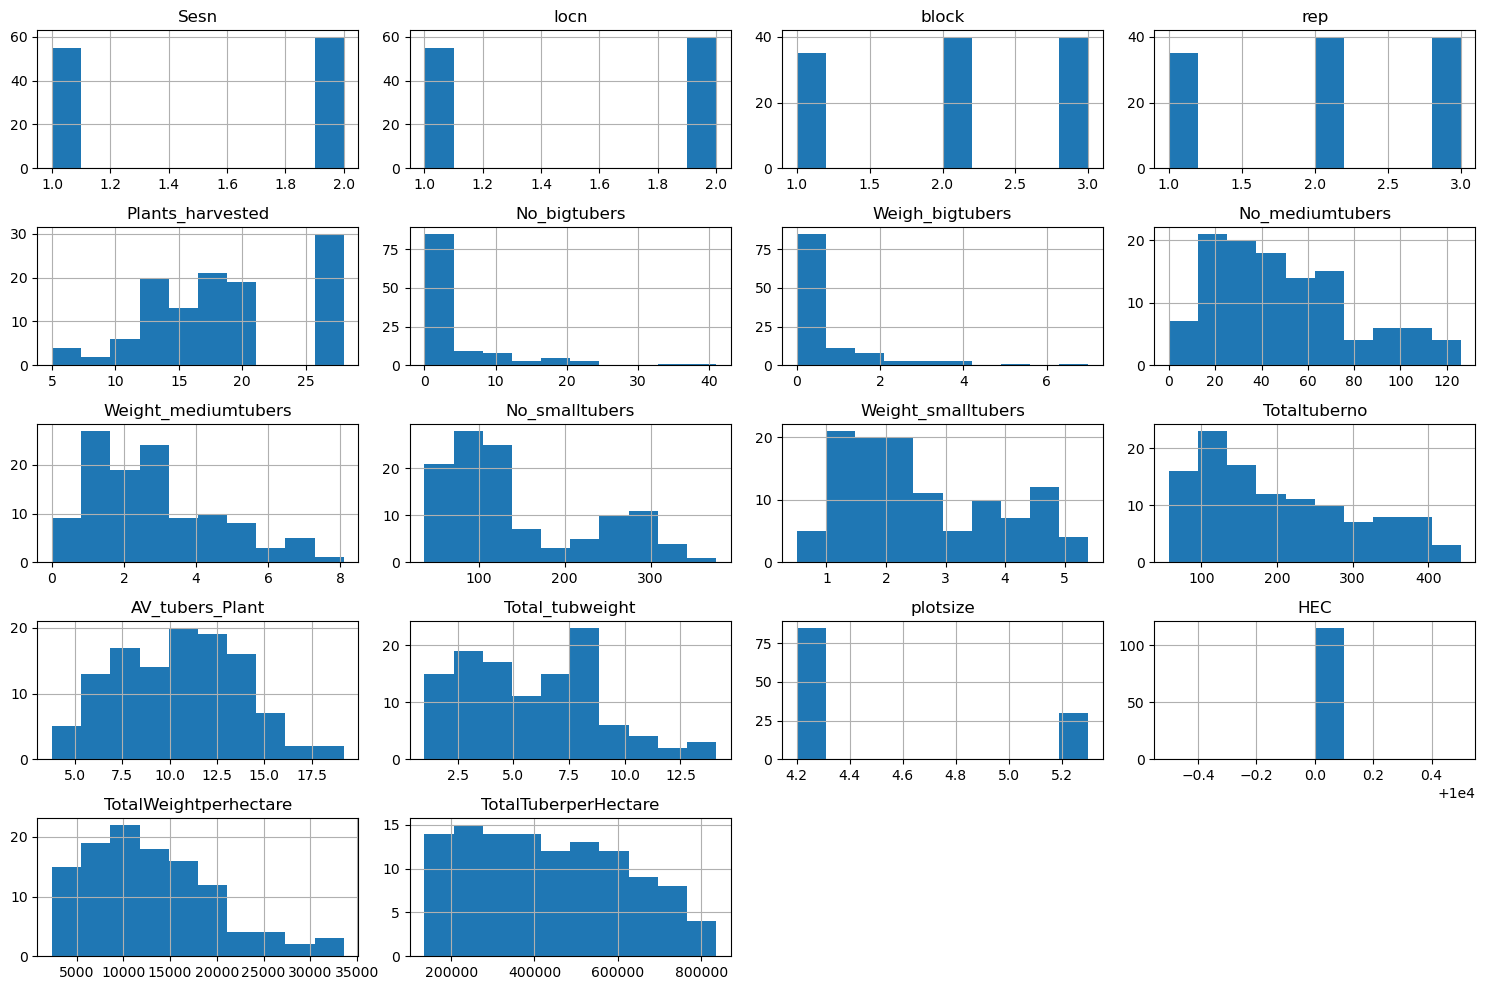

In [5]:
#1 Explore distributions
print("Summary Statistics:\n", df.describe())
df.hist(figsize=(15, 10))
plt.tight_layout()
plt.savefig("outputs/histograms.png")

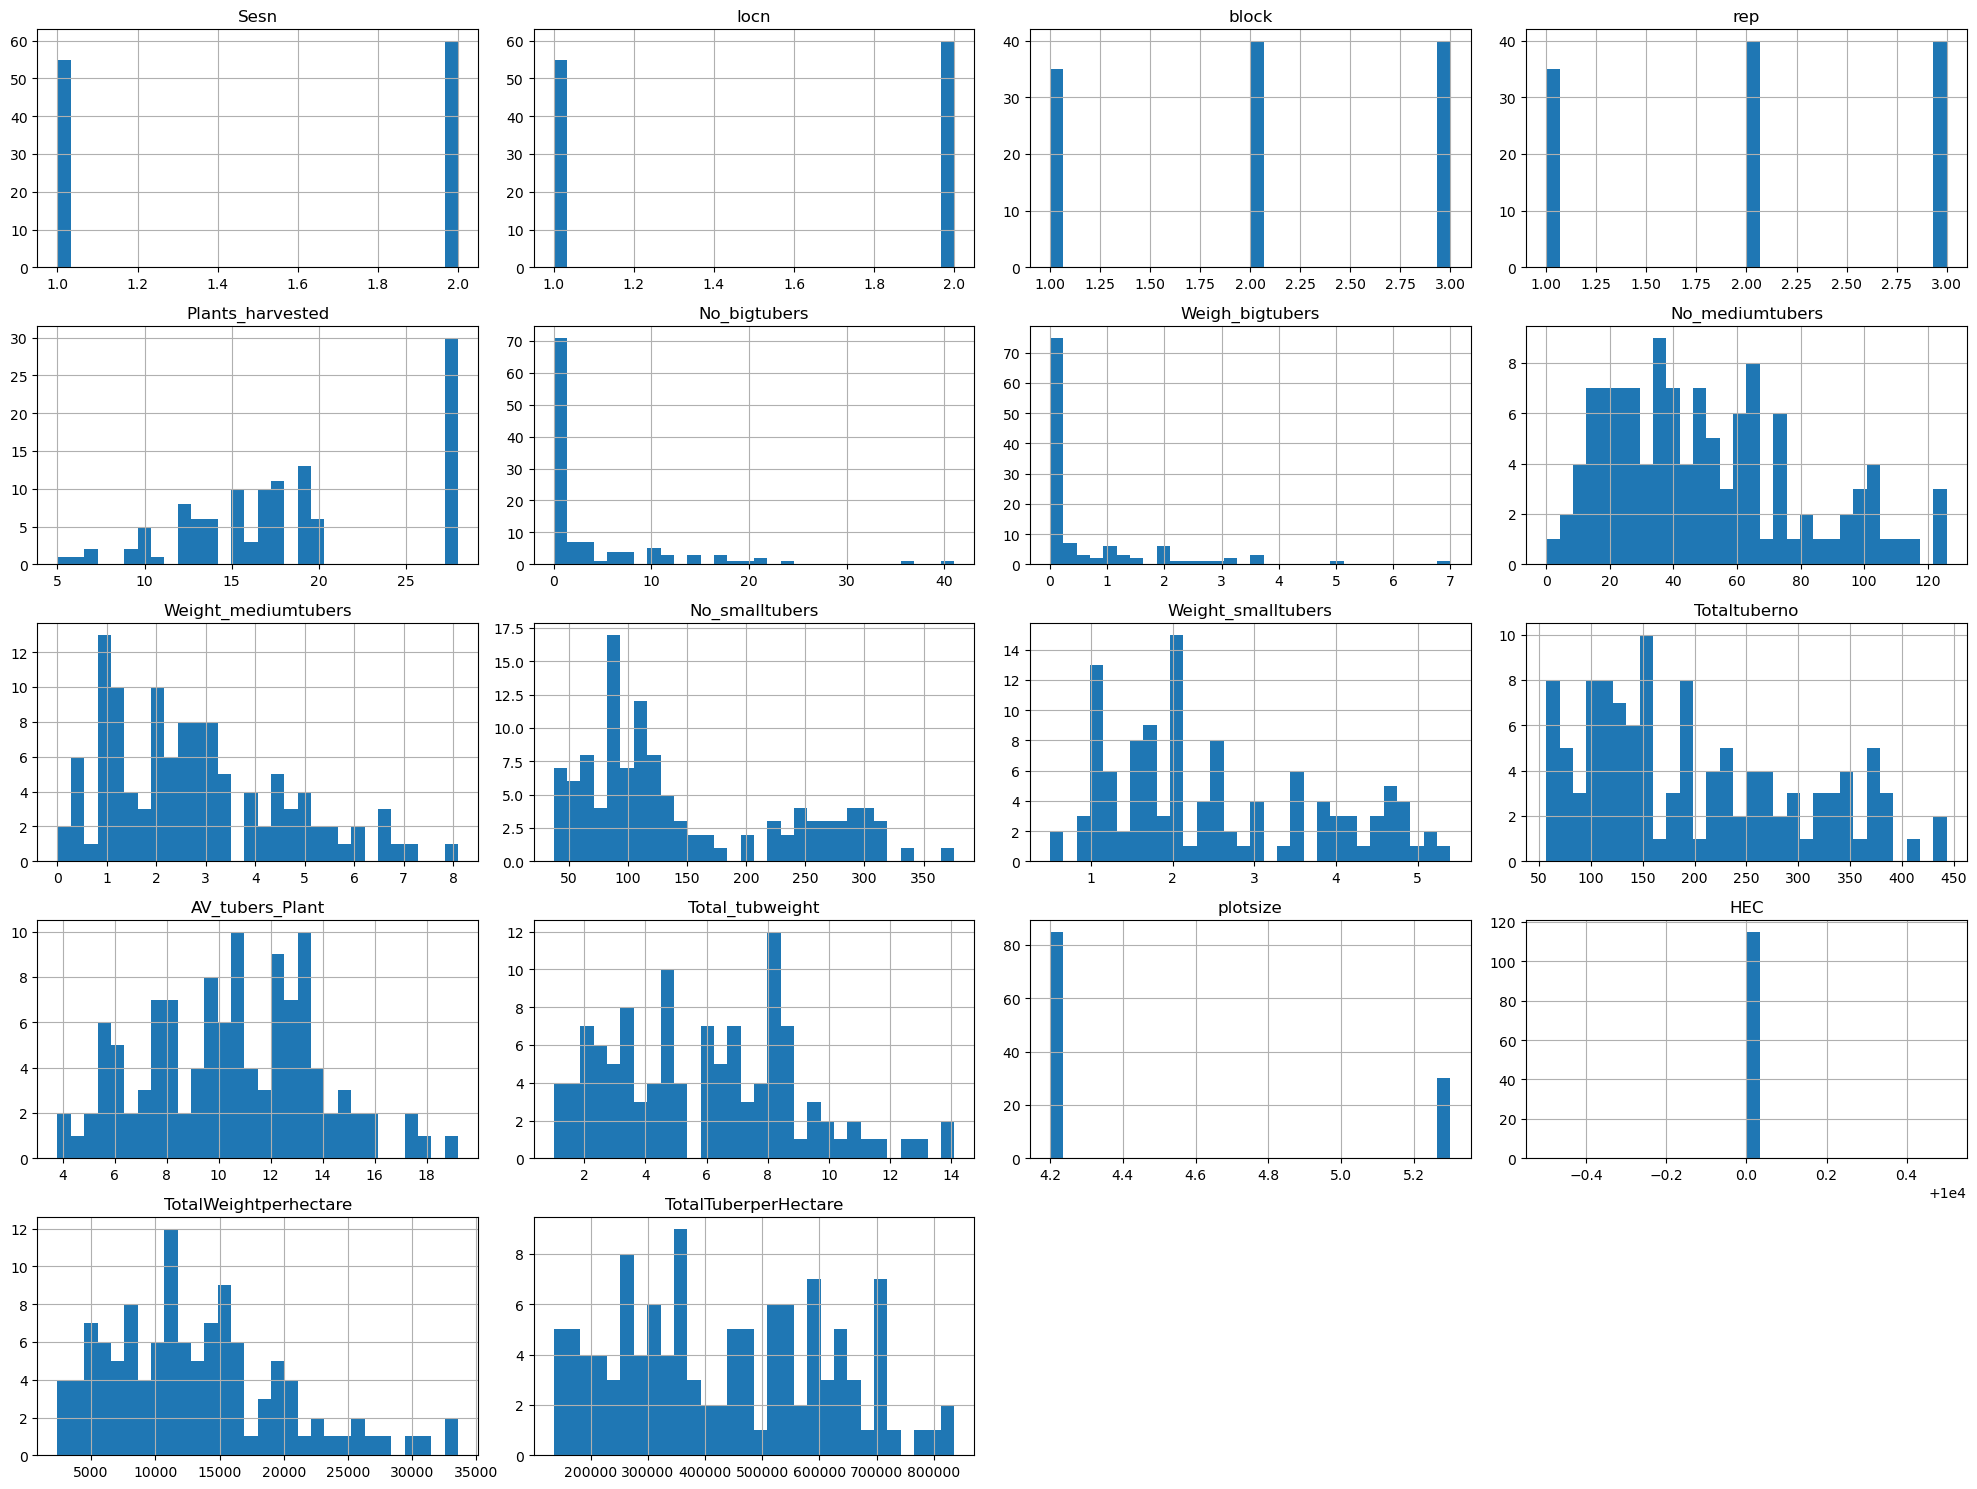

In [6]:
numeric_cols = df.select_dtypes(include='number').columns
#plot distributions
df[numeric_cols].hist(figsize=(20, 15), bins=30)
plt.tight_layout()
plt.show()

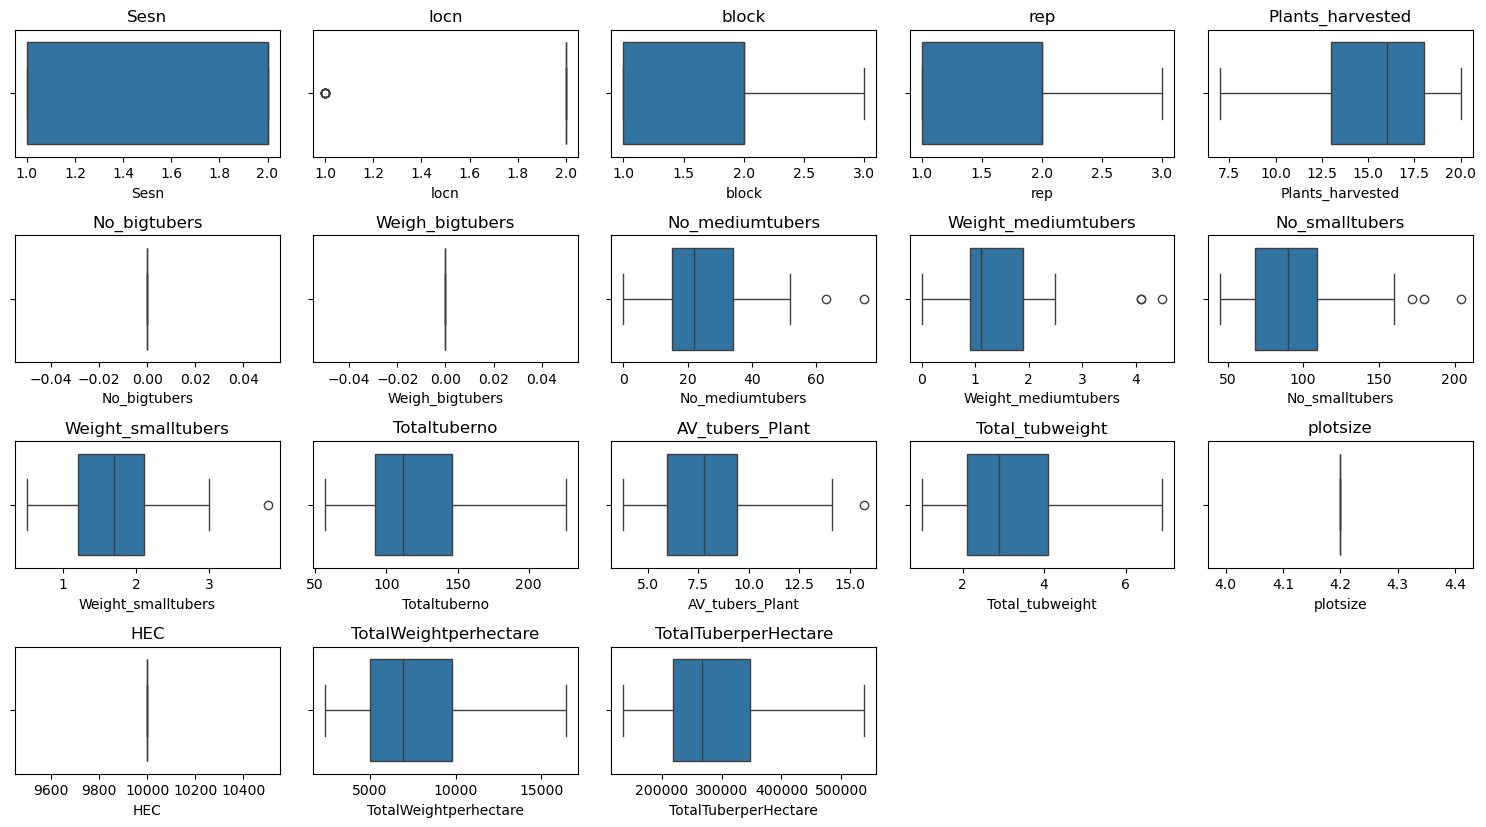

In [13]:
# Handle missing values & outliers


df.fillna(df.median(numeric_only=True), inplace=True)
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(5, 5, i)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [16]:
# IQR filtering
import numpy as np
def remove_outliers(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df[col] = np.where(df[col] <lower, lower, df[col])
        df[col] =np.where(df[col] > upper, upper, df[col])
    return df

numeric_cols = df.select_dtypes(include = np.number).columns
df_clean = remove_outliers(df, numeric_cols)

In [17]:
#Verifying Cleaned Dataset
df_clean.describe()

df_clean.to_excel("Cassava_Yield_Data_Cleaned.xlsx", index=False)

In [ ]:
# QUESTION TWO: 2Investigate the relationships between the following variables using displays (graphs) and statistical tests; [25 Marks] Two continuous variables One continuous variable and one categorical variable Two categorical variables

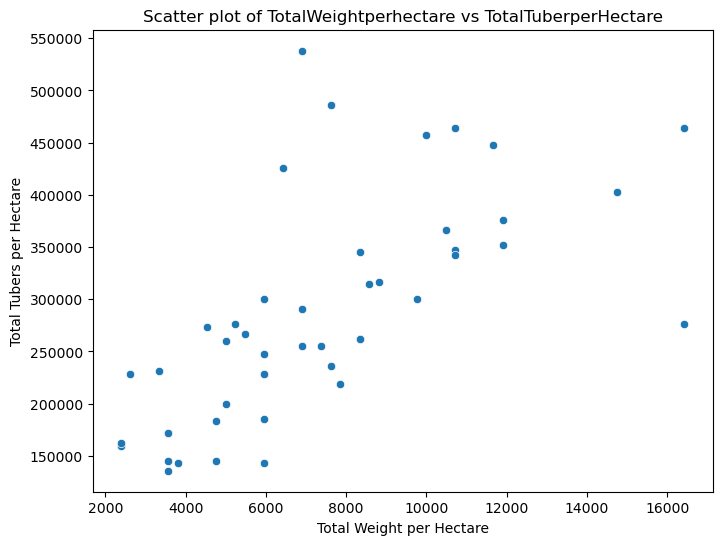

Pearson correlation: 0.66, p-value: 0.0000


In [18]:
#a Two continuous variables

import scipy.stats as stats

# Scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x='TotalWeightperhectare', y='TotalTuberperHectare', data=df_clean)
plt.title('Scatter plot of TotalWeightperhectare vs TotalTuberperHectare')
plt.xlabel('Total Weight per Hectare')
plt.ylabel('Total Tubers per Hectare')
plt.show()

# Correlation coefficient
corr, p_value = stats.pearsonr(df_clean['TotalWeightperhectare'], df_clean['TotalTuberperHectare'])
print(f"Pearson correlation: {corr:.2f}, p-value: {p_value:.4f}")

Missing values in tillage and TotalWeightperhectare:
tillage                  0
TotalWeightperhectare    0
dtype: int64


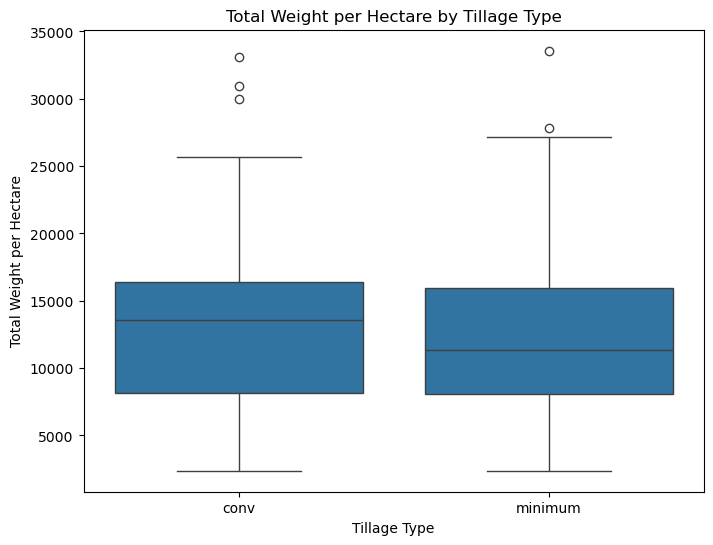

ANOVA F-statistic: 0.26, p-value: 0.6095


In [19]:

#b.      One continuous variable and one categorical variable
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

file_path = r"C:\Users\K\Downloads\Cassava_Yield_Data.xlsx"
df = pd.read_excel(file_path)

df.columns = df.columns.str.strip()  # remove leading/trailing spaces

df['tillage'] = df['tillage'].astype('category')

print("Missing values in tillage and TotalWeightperhectare:")
print(df[['tillage', 'TotalWeightperhectare']].isna().sum())

plt.figure(figsize=(8,6))
sns.boxplot(x='tillage', y='TotalWeightperhectare', data=df)
plt.title('Total Weight per Hectare by Tillage Type')
plt.xlabel('Tillage Type')
plt.ylabel('Total Weight per Hectare')
plt.show()

anova_result = stats.f_oneway(
    df[df['tillage'] == 'conv']['TotalWeightperhectare'],
    df[df['tillage'] == 'minimum']['TotalWeightperhectare']
)

print(f"ANOVA F-statistic: {anova_result.statistic:.2f}, p-value: {anova_result.pvalue:.4f}")


Index(['Sesn', 'locn', 'block', 'rep', 'tillage', 'ferT', 'Plants_harvested',
       'No_bigtubers', 'Weigh_bigtubers', 'No_mediumtubers',
       'Weight_mediumtubers', 'No_smalltubers', 'Weight_smalltubers',
       'Totaltuberno', 'AV_tubers_Plant', 'Total_tubweight', 'plotsize', 'HEC',
       'TotalWeightperhectare', 'TotalTuberperHectare'],
      dtype='object')
ferT     F1100  F2150  F3200  F4250  F5300
tillage                                   
conv        12     12     12     12     12
minimum     11     11     11     11     11


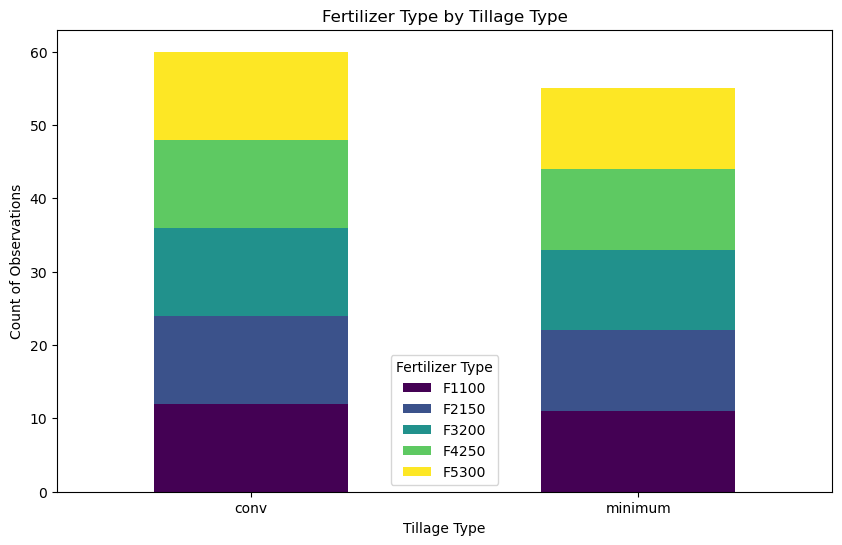

Chi-square statistic: 0.00, p-value: 1.0000, degrees of freedom: 4


In [20]:

#c.       Two categorical variables

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = r"C:\Users\K\Downloads\Cassava_Yield_Data.xlsx"
df = pd.read_excel(file_path)

df.columns = df.columns.str.strip()  # removes leading/trailing spaces
df['tillage'] = df['tillage'].astype('category')
df['ferT'] = df['ferT'].astype('category')

print(df.columns)  # verify 'tillage' and 'ferT' exist now

ct = pd.crosstab(df['tillage'], df['ferT'])
print(ct)

ct.plot(kind='bar', stacked=True, figsize=(10,6), colormap='viridis')
plt.title('Fertilizer Type by Tillage Type')
plt.xlabel('Tillage Type')
plt.ylabel('Count of Observations')
plt.xticks(rotation=0)
plt.legend(title='Fertilizer Type')
plt.show()

from scipy.stats import chi2_contingency
chi2, p, dof, ex = chi2_contingency(ct)
print(f"Chi-square statistic: {chi2:.2f}, p-value: {p:.4f}, degrees of freedom: {dof}")

In [ ]:
#3.      Cassava farmers in Soroti would like to know the following aspects to help inform their farming practices; [20 Marks]

C:\Users\K\AppData\Local\Temp\ipykernel_13336\142731345.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='ferT', y='TotalWeightperhectare', data=df, palette='pastel')


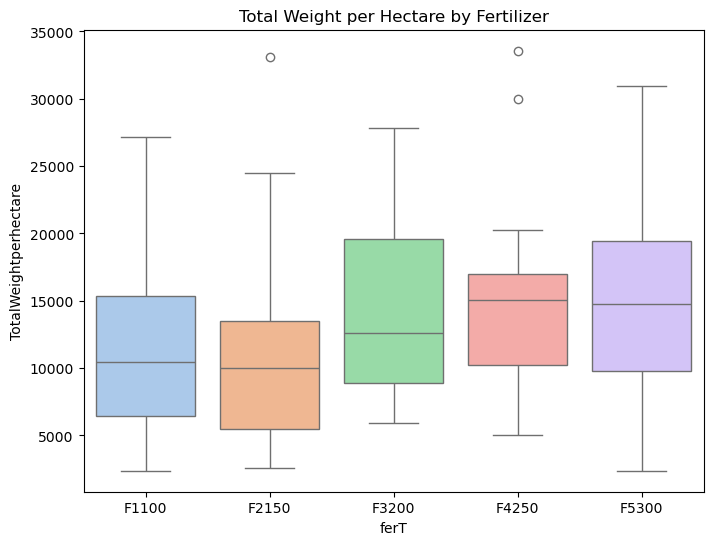

C:\Users\K\AppData\Local\Temp\ipykernel_13336\142731345.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='ferT', y='TotalTuberperHectare', data=df, palette='pastel')


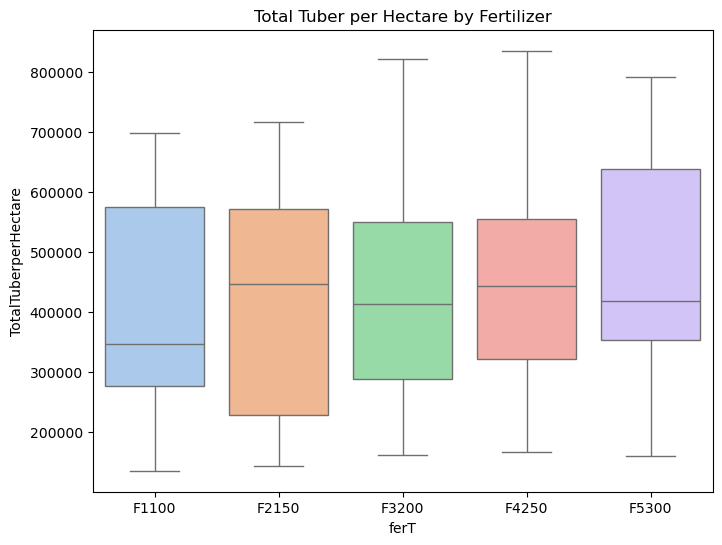

TotalWeightperhectare - t-stat: -0.02, p-value: 0.9825
Hypothesis Test: TotalWeightperhectare
H0: Fertilizer application does not affect total weight per hectare.
H1: Fertilizer application does affect total weight per hectare.
Decision: Fail to reject H0 → No evidence that fertilizer affects total weight per hectare.

TotalTuberperHectare - t-stat: 0.04, p-value: 0.9675
Hypothesis Test: TotalTuberperHectare
H0: Fertilizer application does not affect total tubers per hectare.
H1: Fertilizer application does affect total tubers per hectare.
Decision: Fail to reject H0 → No evidence that fertilizer affects total tubers per hectare.


In [21]:
#Does fertilizer application affect the projected “TotalWeightperhectare” and the "TotalTuberperHectare?

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

file_path = r"C:\Users\K\Downloads\Cassava_Yield_Data.xlsx"
df = pd.read_excel(file_path)
df.columns = df.columns.str.strip()

df['ferT'] = df['ferT'].astype('category')


plt.figure(figsize=(8,6))
sns.boxplot(x='ferT', y='TotalWeightperhectare', data=df, palette='pastel')
plt.title('Total Weight per Hectare by Fertilizer')
plt.show()

plt.figure(figsize=(8,6))
sns.boxplot(x='ferT', y='TotalTuberperHectare', data=df, palette='pastel')
plt.title('Total Tuber per Hectare by Fertilizer')
plt.show()

fertilizer_types = df['ferT'].unique()
group1 = df[df['ferT'] == fertilizer_types[0]]
group2 = df[df['ferT'] == fertilizer_types[1]]

t_stat_w, p_val_w = ttest_ind(group1['TotalWeightperhectare'], group2['TotalWeightperhectare'])
print(f"TotalWeightperhectare - t-stat: {t_stat_w:.2f}, p-value: {p_val_w:.4f}")


print("Hypothesis Test: TotalWeightperhectare")
print("H0: Fertilizer application does not affect total weight per hectare.")
print("H1: Fertilizer application does affect total weight per hectare.")
if p_val_w < 0.05:
    print("Decision: Reject H0 → Fertilizer affects total weight per hectare.\n")
else:
    print("Decision: Fail to reject H0 → No evidence that fertilizer affects total weight per hectare.\n")


t_stat_t, p_val_t = ttest_ind(group1['TotalTuberperHectare'], group2['TotalTuberperHectare'])
print(f"TotalTuberperHectare - t-stat: {t_stat_t:.2f}, p-value: {p_val_t:.4f}")

print("Hypothesis Test: TotalTuberperHectare")
print("H0: Fertilizer application does not affect total tubers per hectare.")
print("H1: Fertilizer application does affect total tubers per hectare.")
if p_val_t < 0.05:
    print("Decision: Reject H0 → Fertilizer affects total tubers per hectare.")
else:
    print("Decision: Fail to reject H0 → No evidence that fertilizer affects total tubers per hectare.")

C:\Users\K\AppData\Local\Temp\ipykernel_13336\3958758262.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='tillage', y='TotalWeightperhectare', data=df, palette='Set2')


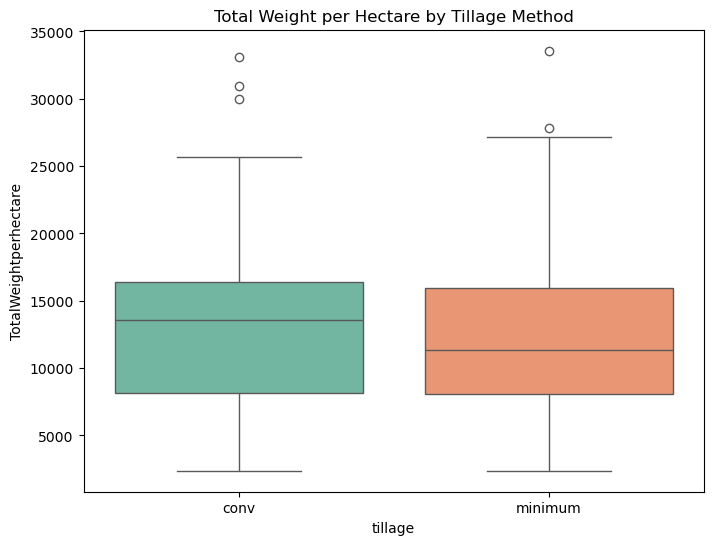

C:\Users\K\AppData\Local\Temp\ipykernel_13336\3958758262.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='tillage', y='TotalTuberperHectare', data=df, palette='Set2')


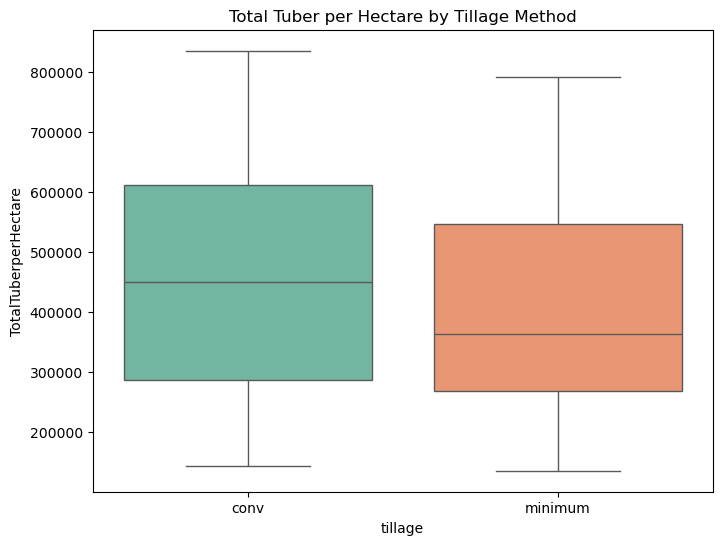

TotalWeightperhectare - t-stat: 0.51, p-value: 0.6095
Hypothesis Test: TotalWeightperhectare
H0: The tillage method (conv or minimum) does not affect total weight per hectare.
H1: The tillage method does affect total weight per hectare.
Decision: Fail to reject H0 → No evidence that tillage method affects total weight per hectare.

TotalTuberperHectare - t-stat: 1.38, p-value: 0.1703
Hypothesis Test: TotalTuberperHectare
H0: The tillage method does not affect total tubers per hectare.
H1: The tillage method does affect total tubers per hectare.
Decision: Fail to reject H0 → No evidence that tillage method affects total tubers per hectare.


In [22]:
#b.      Does the tillage method (“conv” and “minimum”) affect the projected “TotalWeightperhectare” and "TotalTuberperHectare?"
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

file_path = r"C:\Users\K\Downloads\Cassava_Yield_Data.xlsx"
df = pd.read_excel(file_path)
df.columns = df.columns.str.strip()

df['tillage'] = df['tillage'].astype('category')

plt.figure(figsize=(8,6))
sns.boxplot(x='tillage', y='TotalWeightperhectare', data=df, palette='Set2')
plt.title('Total Weight per Hectare by Tillage Method')
plt.show()

plt.figure(figsize=(8,6))
sns.boxplot(x='tillage', y='TotalTuberperHectare', data=df, palette='Set2')
plt.title('Total Tuber per Hectare by Tillage Method')
plt.show()

tillage_types = df['tillage'].unique()
group1 = df[df['tillage'] == tillage_types[0]]
group2 = df[df['tillage'] == tillage_types[1]]

t_stat_w, p_val_w = ttest_ind(group1['TotalWeightperhectare'], group2['TotalWeightperhectare'])
print(f"TotalWeightperhectare - t-stat: {t_stat_w:.2f}, p-value: {p_val_w:.4f}")

# Hypothesis test for TotalWeightperhectare
print("Hypothesis Test: TotalWeightperhectare")
print("H0: The tillage method (conv or minimum) does not affect total weight per hectare.")
print("H1: The tillage method does affect total weight per hectare.")
if p_val_w < 0.05:
    print("Decision: Reject H0 → Tillage method affects total weight per hectare.\n")
else:
    print("Decision: Fail to reject H0 → No evidence that tillage method affects total weight per hectare.\n")

# Total Tuber per hectare
t_stat_t, p_val_t = ttest_ind(group1['TotalTuberperHectare'], group2['TotalTuberperHectare'])
print(f"TotalTuberperHectare - t-stat: {t_stat_t:.2f}, p-value: {p_val_t:.4f}")

# Hypothesis test for TotalTuberperHectare
print("Hypothesis Test: TotalTuberperHectare")
print("H0: The tillage method does not affect total tubers per hectare.")
print("H1: The tillage method does affect total tubers per hectare.")
if p_val_t < 0.05:
    print("Decision: Reject H0 → Tillage method affects total tubers per hectare.")
else:
    print("Decision: Fail to reject H0 → No evidence that tillage method affects total tubers per hectare.")


In [23]:
#4. Check for association between fertilisers across seasons for Cassava using a suitable mining algorithm. [20 Marks]
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from mlxtend.frequent_patterns import apriori, association_rules
from itertools import combinations
file_path = r"C:\Users\K\Downloads\Cassava_Yield_Data.xlsx"
df = pd.read_excel(file_path)
df.columns = df.columns.str.strip()
season_col = 'Sesn'
fertilizer_col = 'ferT'

df = df.dropna(subset=[season_col, fertilizer_col])

season_ferts = df.groupby(season_col)[fertilizer_col].apply(set)

pair_counts = {}
for fert_set in season_ferts:
    for pair in combinations(fert_set, 2):
        pair = tuple(sorted(pair))  # avoid duplicates
        pair_counts[pair] = pair_counts.get(pair, 0) + 1

pair_df = pd.DataFrame([(k[0], k[1], v) for k, v in pair_counts.items()],
                       columns=['Fertilizer1','Fertilizer2','Count'])

total_seasons = len(season_ferts)
pair_df['Support'] = pair_df['Count'] / total_seasons

confidence_list = []
for idx, row in pair_df.iterrows():
    f1, f2 = row['Fertilizer1'], row['Fertilizer2']
    count_f1 = sum(f1 in s for s in season_ferts)
    confidence = row['Count'] / count_f1
    confidence_list.append(confidence)
pair_df['Confidence'] = confidence_list

lift_list = []
for idx, row in pair_df.iterrows():
    f1, f2 = row['Fertilizer1'], row['Fertilizer2']
    count_f2 = sum(f2 in s for s in season_ferts)
    support_f2 = count_f2 / total_seasons
    lift = row['Confidence'] / support_f2
    lift_list.append(lift)
pair_df['Lift'] = lift_list

pair_df['Association'] = pair_df['Lift'].apply(lambda x: 'Associated' if x > 1 else 'Not Associated')

pair_df = pair_df.sort_values(by='Lift', ascending=False).reset_index(drop=True)
print(pair_df[['Fertilizer1','Fertilizer2','Support','Confidence','Lift','Association']])

for idx, row in pair_df.iterrows():
    if row['Lift'] > 1:
        print(f"\nConclusion: Fertilizers {row['Fertilizer1']} and {row['Fertilizer2']} are positively associated across seasons, meaning they tend to be applied together more often than expected by chance. This suggests that farmers commonly use these fertilizers in combination.")
    else:
        print(f"\nConclusion: Fertilizers {row['Fertilizer1']} and {row['Fertilizer2']} show little or negative association across seasons (Lift = {row['Lift']:.2f}).")

  Fertilizer1 Fertilizer2  Support  Confidence  Lift     Association
0       F4250       F5300      1.0         1.0   1.0  Not Associated
1       F1100       F4250      1.0         1.0   1.0  Not Associated
2       F3200       F4250      1.0         1.0   1.0  Not Associated
3       F2150       F4250      1.0         1.0   1.0  Not Associated
4       F1100       F5300      1.0         1.0   1.0  Not Associated
5       F3200       F5300      1.0         1.0   1.0  Not Associated
6       F2150       F5300      1.0         1.0   1.0  Not Associated
7       F1100       F3200      1.0         1.0   1.0  Not Associated
8       F1100       F2150      1.0         1.0   1.0  Not Associated
9       F2150       F3200      1.0         1.0   1.0  Not Associated

Conclusion: Fertilizers F4250 and F5300 show little or negative association across seasons (Lift = 1.00).

Conclusion: Fertilizers F1100 and F4250 show little or negative association across seasons (Lift = 1.00).

Conclusion: Fertilizers F3

In [24]:
# 5 Generate a predictive model for the variables" plants_harvested" that can be used to inform farmers and policy makers. how accuracte is your model?

# Step 0: Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Step 1: Load data 
file_path = r"C:\Users\K\Downloads\Cassava_Yield_Data.xlsx"
df = pd.read_excel(file_path)
df.columns = df.columns.str.strip()

# Step 2: Preprocessing
# Drop rows with missing target
df = df.dropna(subset=['Plants_harvested'])

# Select features and target
X = df[['TotalWeightperhectare','TotalTuberperHectare','ferT','tillage','Sesn']]
y = df['Plants_harvested']

# One-hot encode categorical variables
X = pd.get_dummies(X, columns=['ferT','tillage','Sesn'], drop_first=True)

# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Step 4: Evaluate Linear Regression
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print("Linear Regression Performance:")
print(f"R²: {r2_lr:.2f}, MAE: {mae_lr:.2f}, RMSE: {rmse_lr:.2f}")

# Step 5: Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Step 6: Evaluate Random Forest
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print("\nRandom Forest Performance:")
print(f"R²: {r2_rf:.2f}, MAE: {mae_rf:.2f}, RMSE: {rmse_rf:.2f}")

# Step 7: Feature Importance (Random Forest)
importances = pd.Series(rf_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print("\nFeature Importances:")
print(importances)

Linear Regression Performance:
R²: 0.83, MAE: 1.88, RMSE: 2.76

Random Forest Performance:
R²: 0.83, MAE: 1.97, RMSE: 2.77

Feature Importances:
TotalTuberperHectare     0.677991
TotalWeightperhectare    0.153604
Sesn_2                   0.129634
tillage_minimum          0.013812
ferT_F3200               0.008964
ferT_F4250               0.006068
ferT_F2150               0.005768
ferT_F5300               0.004159
dtype: float64


In [25]:
# Save cleaned and transformed dataset
df.to_csv("cassava_yield_cleaned.csv", index=False)
print("✅ Cleaned dataset saved as 'francis_omara_B35099.csv'")

✅ Cleaned dataset saved as 'francis_omara_B35099.csv'
